Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("retail_sales_dataset.csv")

Data Preprocessing

In [4]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
data.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [7]:
data.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

No null values

Identify the relevant variables for aggregating sales data, such as region, sales amount, and product category

In [8]:
product_relevant_cols=['Date','Product Category','Quantity','Price per unit','Total Amount']

Group the sales data by region and calculate the total sales amount for each region

In [9]:
product_sales = data.groupby(data['Product Category'])['Total Amount'].sum().reset_index()

In [10]:
product_sales

,Product Category,Total Amount
0,Beauty,143515
1,Clothing,155580
2,Electronics,156905


 Create bar plots or pie charts to visualize the sales distribution by region
 #regionwise data not available hence sales distribution by product category is visualized

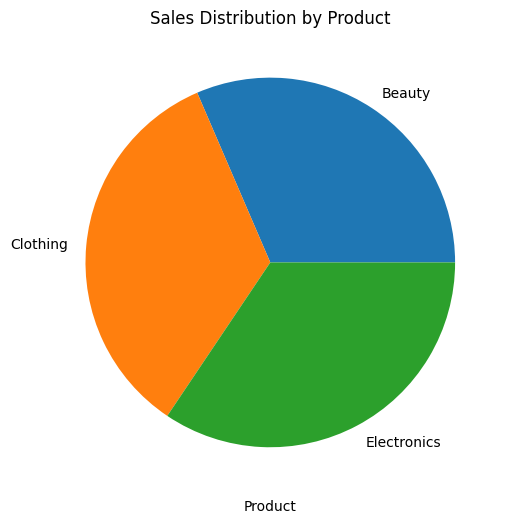

In [16]:
plt.figure(figsize=(10, 6))
plt.pie(product_sales['Total Amount'],labels=product_sales['Product Category'])
plt.xlabel('Product')
plt.title('Sales Distribution by Product')
plt.xticks(rotation=45)
plt.grid(True)

Identify the top-performing regions based on the highest sales amount. #regionwise data not available hence arranced productwise

In [20]:
product_sales.sort_values(by='Total Amount', ascending=False)

,Product Category,Total Amount
2,Electronics,156905
1,Clothing,155580
0,Beauty,143515


Group the sales data by region and product category to calculate the total sales amount for each combination
#grouped according to gender anf total amount

In [29]:
gender_based_sales = data.groupby(data['Gender'])['Total Amount'].sum()

In [30]:
gender_based_sales

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

Create stacked bar plots or grouped bar plots to compare the sales amounts across different regions and product categories.

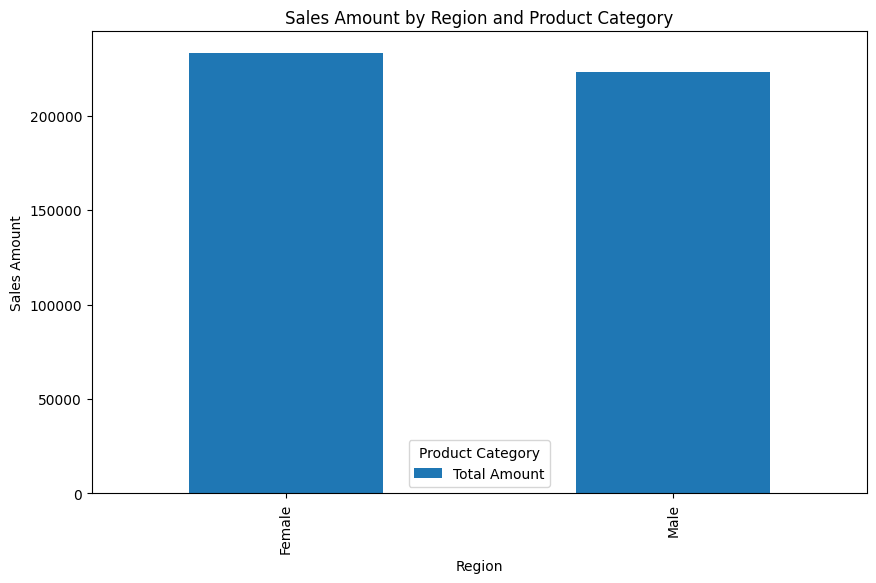

In [31]:
gender_based_sales.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sales Amount by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Sales Amount')
plt.legend(title='Product Category')
plt.show()